# Problem # 1 - Reverse Engineer a Publicly Available Index

## By: Matthew Pribadi

Citations: 

### Objective: 

- The main motivation for this project is to ... 
<br><br>

### Project Summary
#### *Outcome Variable*
In this project...
<br><br>

### Terminology:
- The **FHFA House Price Index (HPI)** is a broad measure of the movement of single-family house prices.  The HPI is a weighted, repeat-sales index, meaning that it measures average price changes in repeat sales or refinancings on the same properties. This information is obtained by reviewing repeat mortgage transactions on single-family properties whose mortgages have been purchased or securitized by Fannie Mae or Freddie Mac since January 1975.

#### Assumptions/Limitations
- In order to merge the datasets, I am taking yearly averages for all the data sets. This is a major limitation, and would be improved through adding seasonality when I have more time.
- According to the methodology of the paper, they utilized bi-annual mortgage rate averages. For the sake of time, I have taken the average annual mortgage rates.
- I am using Zillow data which only starts from the year 2000

## Step 1: Import packages

In [45]:
# general
import datetime
import io
import os
import numpy as np
import pandas as pd
from zipfile import ZipFile
import requests
from requests.auth import HTTPBasicAuth
import warnings
warnings.filterwarnings('ignore')
import re

# plots
from IPython.display import Image
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
import pydot


%matplotlib inline
sns.set_theme(color_codes=True)

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

## Step 2: Define Functions for Data Cleaning & Processing

## Step 3: Read Data, Cleaning and Preprocessing 

In [214]:
url_zillow = 'https://files.zillowstatic.com/research/public_csvs/zhvi/County_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv?t=1661810413'
url_HPI = 'https://www.fhfa.gov/HPI_master.csv '
url_rates = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=MORTGAGE30US&scale=left&cosd=1971-04-02&coed=2022-08-25&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Thursday&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-08-29&revision_date=2022-08-29&nd=1971-04-02'


In [238]:
df_zillow = pd.read_csv(url_zillow)
df_HPI = pd.read_csv(url_HPI)

parse_dates = ['DATE']
df_rates = pd.read_csv(url_rates, parse_dates=parse_dates)


In [239]:
df_zillow.dropna(axis=1)

# df_zillow.set_index(['Metro'], inplace = True)
df_zillow.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31
0,3101,0,Los Angeles County,County,CA,CA,Los Angeles-Long Beach-Anaheim,6,37,214234.0,214343.0,215321.0,217094.0,219299.0,221313.0,223383.0,225725.0,227850.0,229571.0,231225.0,232889.0,234067.0,235157.0,236578.0,238798.0,241011.0,243296.0,245663.0,248289.0,250563.0,252991.0,255109.0,257462.0,259203.0,261246.0,263815.0,267193.0,270905.0,274523.0,279231.0,284256.0,289648.0,294450.0,299233.0,303780.0,307345.0,310481.0,314242.0,318196.0,323309.0,327285.0,333212.0,339354.0,346256.0,351380.0,356348.0,361716.0,368087.0,374514.0,381149.0,389573.0,400198.0,410598.0,419924.0,428466.0,438742.0,448544.0,455178.0,460771.0,465064.0,472429.0,479231.0,486852.0,493056.0,500678.0,509190.0,518542.0,527713.0,538098.0,545365.0,551757.0,557290.0,562192.0,567594.0,571303.0,577130.0,581585.0,584484.0,586324.0,584626.0,584266.0,584087.0,586017.0,586597.0,586346.0,584808.0,584308.0,581695.0,579056.0,574088.0,569166.0,563658.0,557006.0,5

In [275]:
df_zillow_metro = df_zillow.iloc[:,[5,6]]


df_zillow_metro.head()

,State,Metro
0,CA,Los Angeles-Long Beach-Anaheim
1,IL,Chicago-Naperville-Elgin
2,TX,Houston-The Woodlands-Sugar Land
3,AZ,Phoenix-Mesa-Scottsdale
4,CA,San Diego-Carlsbad


In [242]:
df_date_zillow = df_zillow.iloc[:,10:].transpose().reset_index().rename(columns={'index':'date'})
df_date_zillow.set_index(['date']).head()

0         1         2         3         4         5     \
date                                                                     
2000-02-29  214343.0  178963.0  115631.0  145123.0  226411.0  276049.0   
2000-03-31  215321.0  179652.0  115401.0  145585.0  227738.0  277794.0   
2000-04-30  217094.0  180868.0  115375.0  146495.0  230698.0  281431.0   
2000-05-31  219299.0  182273.0  115323.0  147405.0  233537.0  284474.0   
2000-06-30  221313.0  183486.0  115565.0  148089.0  237218.0  287712.0   

                6         7         8         9         10        11    \
date                                                                     
2000-02-29  229889.0  133973.0  116119.0  255277.0  161959.0  130862.0   
2000-03-31  231376.0  134428.0  116220.0  257174.0  162498.0  131562.0   
2000-04-30  234507.0  135355.0  116455.0  260061.0  163704.0  132910.0   
2000-05-31  237492.0  136043.0  116708.0  262475.0  165201.0  133830.0   
2000-06-30  240621.0  136756.0  116951.0  264748.0  166975.0  134640.0   

                12        13        14        15        16        17    \
date                                                                     
2000-02-29  167186.0  248878.0  115599.0  118844.0  435284.0  111841.0   
2000-03-31  167533.0  250117.0  116367.0  118867.0  439016.0  112204.0   
2000-04-30  168259.0  252455.0  117643.0  119015.0  449694.0  112964.0   
2000-05-31  169061.0  254967.0  118896.0  119153.0  459918.0  113636.0   
2000-06-30  169741.0  256926.0  120081.0  119337.0  472054.0  114284.0   

                18        19       20        21        22        23    \
date                                                                    
2000-02-29  118950.0  383731.0  74965.0  289100.0  269900.0  235186.0   
2000-03-31  119062.0  386633.0  75153.0  291339.0  271318.0  236592.0   
2000-04-30  119281.0  393190.0  75544.0  299900.0  274241.0  239399.0   
2000-05-31  118373.0  400393.0  76150.0  311536.0  277045.0  242135.0   
2000-06-30  117434.0  407941.0  76637.0  320537.0  280283.0  244935.0   

                24        25        26        27        28        29    \
date                                                                     
2000-02-29  153233.0  191869.0  266647.0  133257.0  121276.0  113948.0   
2000-03-31  154008.0  192765.0  268421.0  133704.0  121549.0  114391.0   
2000-04-30  155368.0  194698.0  271963.0  134446.0  122067.0  115319.0   
2000-05-31  156834.0  196571.0  275194.0  135146.0  122934.0  116015.0   
2000-06-30  158084.0  198756.0  278202.0  135783.0  123726.0  116693.0   

               30        31        32        33        34        35    \
date                                                                    
2000-02-29  92870.0  191788.0  124934.0  159816.0  126384.0  233385.0   
2000-03-31  93068.0  192324.0  125196.0  160446.0  126922.0  234262.0   
2000-04-30  93463.0  193333.0  125639.0  162054.0  127789.0  236184.0   
2000-05-31  94054.0  194697.0  126113.0  163508.0  128636.0  238377.0   
2000-06-30  94528.0  196122.0  126519.0  165283.0  129355.0  240827.0   

                36        37        38        39        40        41    \
date                                                                     
2000-02-29  316736.0  191364.0  197270.0  127023.0  127681.0  225726.0   
2000-03-31  318430.0  191626.0  197962.0  127313.0  127931.0  225858.0   
2000-04-30  322141.0  192147.0  198947.0  127917.0  128324.0  226425.0   
2000-05-31  326326.0  194821.0  199566.0  128597.0  128818.0  227802.0   
2000-06-30  330674.0  196886.0  199645.0  129432.0  129293.0  229822.0   

                42        43        44        45        46        47    \
date                                                                     
2000-02-29  253085.0  338995.0  100942.0  120075.0  125529.0  192152.0   
2000-03-31  253689.0  340882.0  101153.0  118656.0  125608.0  193135.0   
2000-04-30  254646.0  344305.0  101432.0  117715.0  125956.0  195210.0   
2000-05-31  256034.0  34738

In [243]:
df_date_zillow['date'] = pd.to_datetime(df_date_zillow['date'])

In [300]:
df_agg_date_zillow = df_date_zillow.groupby(df_date_zillow['date']
                                            .map(lambda x: x.year)).agg('mean').transpose()\
                                            .assign(Index=range(len(df_agg_date_zillow))).set_index('Index')

df_agg_date_zillow.reindex_like(df_zillow_metro).head()

TypeError: reindex_like() got an unexpected keyword argument 'axis'

In [334]:
df_cleaned_zillow = pd.concat([df_zillow_metro, df_agg_date_zillow], axis=1).dropna(axis=0)

In [327]:
# df_cleaned_zillow = df_cleaned_zillow.transpose()

In [336]:
df_cleaned_zillow.set_index(['State','Metro']).head()

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,Metro,,,,,,,,,,,,,,,,,,,,,,,
CA,Los Angeles-Long Beach-Anaheim,223455.727273,244915.333333,278956.916667,332427.000000,414645.333333,507331.250000,577241.500000,571906.750000,480673.583333,400439.000000,398723.750000,377021.833333,370799.833333,433339.666667,478676.666667,503619.000000,538231.250000,573826.250000,618283.166667,626792.916667,664316.583333,760641.583333,849390.571429
IL,Chicago-Naperville-Elgin,185382.454545,202676.916667,220118.833333,238296.333333,258792.666667,284954.833333,307319.416667,308790.500000,284789.000000,246325.166667,225786.333333,201917.916667,185674.083333,196368.583333,213428.583333,221125.583333,230626.083333,243179.333333,253550.333333,256811.583333,260614.416667,286555.666667,312291.714286
TX,Houston-The Woodlands-Sugar Land,116144.818182,117806.583333,121198.166667,125020.333333,132811.272727,138696.916667,140670.750000,144953.666667,143286.833333,139377.333333,138339.916667,131813.083333,131050.166667,141621.583333,156910.166667,171247.166667,179426.083333,186119.666667,193853.750000,202217.416667,210116.083333,238656.083333,275472.142857
AZ,Phoenix-Mesa-Scottsdale,148805.181818,156896.916667,164427.416667,173112.583333,188251.700000,249207.666667,305123.833333,287577.416667,233535.750000,175482.916667,158114.333333,139873.750000,154984.000000,188819.916667,206017.000000,217520.916667,232751.666667,247256.916667,265560.250000,281037.583333,309859.666667,392685.833333,471566.285714
CA,San Diego-Carlsbad,241432.545455,279540.250000,319518.583333,382794.250000,470920.416667,551726.416667,557722.250000,519208.000000,439524.666667,374785.333333,380205.833333,358872.166667,357420.166667,417458.916667,456225.750000,473569.750000,505271.416667,539506.750000,577130.416667,585371.750000,623129.583333,754507.583333,892745.714286


In [311]:
df_red = df_HPI[df_HPI['yr']>=2000]

df_red.head()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
108,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,2000,1,149.75,150.19
109,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,2000,2,149.27,149.33
110,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,2000,3,151.32,150.78
111,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,2000,4,152.35,151.46
112,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,2000,5,153.56,151.81


In [312]:
df_yr_HPI = df_red.groupby(['place_name','yr']).agg({'index_nsa': np.mean})

df_yr_HPI

index_nsa
place_name                                         yr              
Abilene, TX                                        2000  115.017500
                                                   2001  119.947500
                                                   2002  123.260000
                                                   2003  126.535000
                                                   2004  132.190000
                                                   2005  141.277500
                                                   2006  153.320000
                                                   2007  162.520000
                                                   2008  165.562500
                                                   2009  169.332500
                                                   2010  169.327500
                                                   2011  167.437500
                                                   2012  170.215000
                                                   2013  175.935000
                                                   2014  185.745000
                                                   2015  190.667500
                                                   2016  199.210000
                                                   2017  206.872500
                                                   2018  218.302500
                                                   2019  225.322500
                                                   2020  235.490000
                                                   2021  265.932500
                                                   2022  290.400000
Akron, OH                                          2000  138.538750
                                                   2001  145.018750
                                                   2002  148.853750
                                                   2003  153.730000
                                                   2004  157.278750
                                                   2005  161.861250
                                                   2006  162.913750
                                                   2007  159.453750
                                                   2008  152.240000
                                                   2009  146.777500
                                                   2010  143.603750
                                                   2011  137.013750
                                                   2012  136.617500
                                                   2013  142.121250
                                                   2014  144.400000
                                                   2015  150.393750
                                                   2016  155.182500
                                                   2017  162.882500
                                                   2018  171.012500
                                                   2019  179.803750
                                                   2020  193.570000
                                                   2021  220.128750
                                                   2022  236.870000
Alabama                                            2000  156.621250
                                                   2001  163.347500
                                                   2002  167.865000
                                                   2003  174.531875
                                                   2004  181.245625
                                                   2005  194.295625
                                                   2006  209.361250
                                                   2007  217.853125
                                                   2008  216.579375
                                                   2009  211.195000
                                                   2010  201.270625
                                              

In [69]:
df_rates.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


<AxesSubplot:xlabel='DATE'>

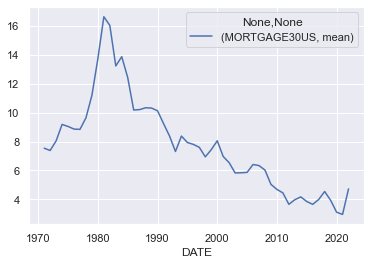

In [44]:
#Generate a list of average mortgage rates per year in the United States

df_avg_rates = df_rates.groupby(df_rates['DATE'].map(lambda x: x.year)).agg(['mean'])

df_avg_rates.plot()